##  Support Vector Machine (SVM)

###  Historia y Origen

El **Support Vector Machine (SVM)** fue inventado en **1963** por  
**Vladimir N. Vapnik** y **Alexey Ya. Chervonenkis** mientras trabajaban en **AT&T Bell Labs**.  
Posteriormente, Vladimir Vapnik se unió a **Facebook AI Research** en noviembre de **2014**.

En **1992**, **Bernhard E. Boser**, **Isabelle M. Guyon** y **Vladimir N. Vapnik** propusieron un método para crear **clasificadores no lineales** aplicando el denominado **kernel trick** a los **hiperplanos de margen máximo (maximum-margin hyperplanes)**.

La versión moderna, conocida como **soft margin SVM**, fue propuesta por  
**Corinna Cortes** y **Vladimir Vapnik** en **1993** y publicada en **1995**.

---



## 1️⃣ Introducción

Métodos de aprendizaje supervisado utilizados para clasificación, regresión y detección de valores atípicos.

Supongamos que tenemos dos clases aquí: negra y morada.  
En la clasificación, estamos interesados en la mejor manera de separar las dos clases.

<img src='img//SVM_1.png' width=50%>

Podemos separarlas con una línea como en el siguiente ejemplo.  
Puedes considerar esto como un ejemplo de cómo la regresión logística separaría las dos clases.

<img src='img//SVM_2.png' width=50%>

Sin embargo, hay infinitas líneas (en un espacio bidimensional) o hiperplanos (en un espacio tridimensional) que pueden usarse para separar las dos clases, como se ilustra en el siguiente ejemplo.

El término *hiperplano* esencialmente significa que es un subespacio de una dimensión menos que su espacio ambiente.  
Si un espacio es tridimensional, entonces sus hiperplanos son planos bidimensionales, mientras que si el espacio es bidimensional, sus hiperplanos son líneas unidimensionales.

<img src='img//SVM_3.png' width=50%>

En SVM, la **línea separadora**, la línea marrón sólida, es la línea que permite el mayor margen entre las dos clases.

El SVM colocará la línea separadora en el centro del margen, también llamado **margen máximo**.  
El SVM optimizará y ubicará el hiperplano que maximiza el margen entre las dos clases.

Las muestras que están más cerca del hiperplano se denominan **vectores de soporte**, y están marcadas con un círculo rojo.

<img src='img//SVM_4.png' width=50%>


---
## 2️⃣ Clasificación SVM Lineal

### Vectores de Soporte

Separar con una línea recta (linealmente separable).

### Margen

**Clasificación de margen rígido (Hard Margin)**

Basada estrictamente en aquellos puntos que se encuentran en el margen entre las dos clases.  
Sin embargo, esto es sensible a los valores atípicos (*outliers*).

**Clasificación de margen suave (Soft Margin)**

Amplía el margen y permite violaciones.  
Con Python Scikit-Learn, puedes controlar el ancho del margen.  
Se controla con el hiperparámetro **C**:  
- Un **C** más pequeño conduce a una calle más ancha, pero con más violaciones del margen.  
- Un **C** más grande genera menos violaciones del margen, pero termina con un margen más pequeño.

**Nota:**  
Los SVM son sensibles a la escala de las características (*feature scaling*).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

### 📘 Documentación de cada uno:

**LinearSVC**

Similar a `SVC` con el parámetro `kernel='linear'`, pero implementado en términos de **liblinear** en lugar de **libsvm**, por lo que ofrece más flexibilidad en la elección de penalizaciones y funciones de pérdida, y debería escalar mejor a un gran número de muestras.

**SVC**

Clasificación de Vectores de Soporte tipo **C-Support Vector Classification**.  

La implementación se basa en **libsvm**.  
La complejidad del tiempo de ajuste (*fit time complexity*) es más que cuadrática con respecto al número de muestras, lo que hace difícil escalar a conjuntos de datos con más de unas pocas decenas de miles de muestras.


In [7]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=0.001, kernel='linear')

In [8]:
clf.predict([[6, 2]])

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


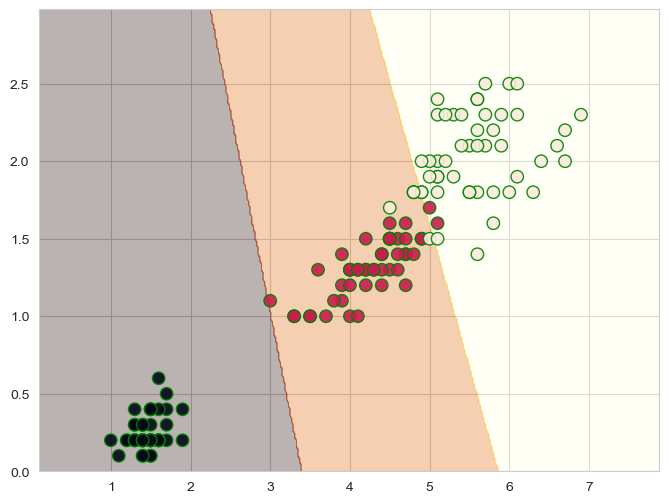

In [9]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g')

plt.show()


## Implementacion SVM linear

In [10]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

### Scale features

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

C = 1.0 #0.01
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(kernel='linear')

### Cross Validation dentro del dataset entrenado

In [12]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [13]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [14]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9500
Recall Score: 		 0.9500
F1 Score: 		 0.9500


### Cross Validation dentro del dataset test

In [15]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [16]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


## 3️⃣ Clasificación SVM con Núcleo Polinómico



<img src='img//svm_polynomial.png' width=40%, height=40%>

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


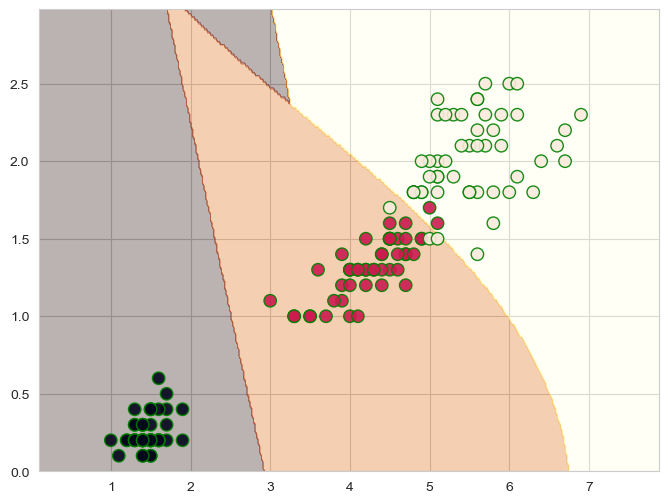

In [17]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X, y)

Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g')

plt.show()

## Implementacion SVM polinomica

In [23]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)
C = 1.0 #0.01
clf = svm.SVC(kernel='poly', degree=10, C=C, gamma='auto') #5
clf.fit(X_std_train, y_train)

SVC(degree=10, gamma='auto', kernel='poly')

### Cross Validation dentro del dataset train

In [24]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.7833
Accuracy SD: 		 0.1404


In [25]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[35,  0,  4],
       [ 0, 37,  0],
       [ 7, 18, 19]], dtype=int64)

In [26]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.7812
Recall Score: 		 0.7583
F1 Score: 		 0.7368


### Cross Validation dentro del dataset test

In [27]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  1],
       [ 0, 13,  0],
       [ 3,  3,  0]], dtype=int64)

In [28]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.6341
Recall Score: 		 0.7667
F1 Score: 		 0.6941


## 4️⃣ Función de Base Radial Gaussiana (RBF)

La función de núcleo puede ser cualquiera de las siguientes:

**lineal:**  
$$
K(x, x') = x \cdot x'
$$

**polinómica:**  
$$
K(x, x') = (\gamma \, x \cdot x' + \text{coef0})^{\text{degree}}
$$  
El parámetro **degree** se especifica mediante la palabra clave `degree`,  
y **coef0** mediante `coef0`.

**RBF (Radial Basis Function):**  
$$
K(x, x') = e^{-\gamma \|x - x'\|^2}
$$  
El parámetro **gamma** se especifica mediante la palabra clave `gamma` y debe ser mayor que 0.

**sigmoide:**  
$$
K(x, x') = \tanh(\gamma \, x \cdot x' + \text{coef0})
$$  
donde **coef0** se especifica mediante `coef0`.


In [29]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0) #0.6

sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(gamma=0.7)

### Cross Validation dentro del dataset train

In [30]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [31]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [32]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


### Búsqueda en Cuadrícula (Grid Search)


In [33]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 

pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 
svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [34]:
svm_grid_rbf.best_score_

0.9583333333333334

In [35]:
best = svm_grid_rbf.best_estimator_.get_params() 
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 0.50
	clf__gamma: 	 0.50


In [36]:
y_test_pred = svm_grid_rbf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [37]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


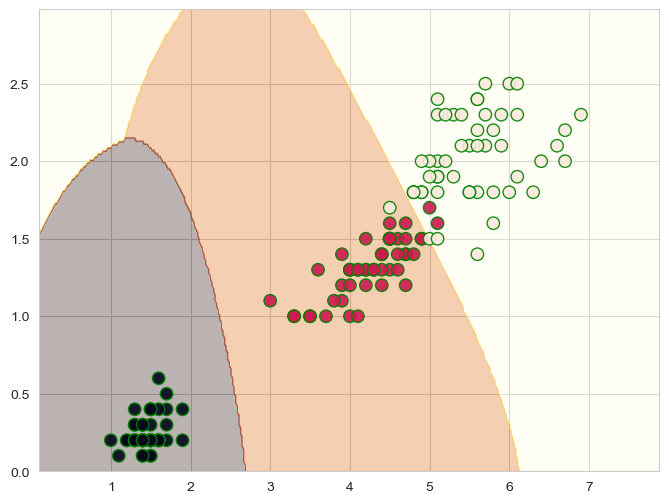

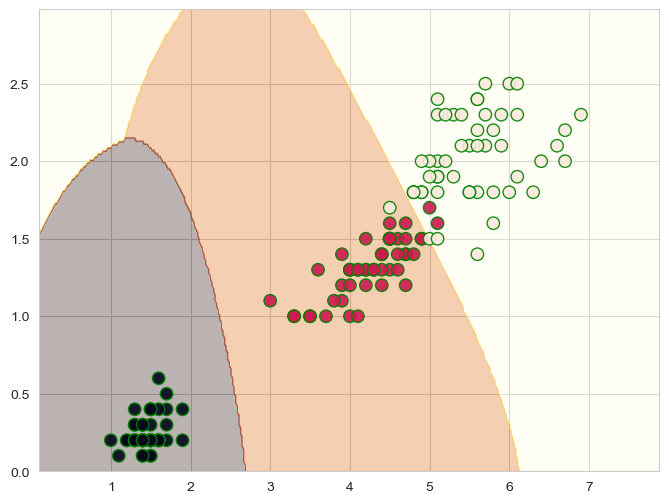

In [39]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g')

plt.show()

## 5️⃣ Regresión de Vectores de Soporte (SVR)

La **Regresión de Vectores de Soporte (SVR)** es una extensión de las Máquinas de Vectores de Soporte (SVM) para problemas de regresión.  
En lugar de intentar clasificar los datos en categorías, SVR busca **ajustar una función** que se mantenga dentro de un margen de tolerancia determinado.

El objetivo de SVR es encontrar una función que se desvíe lo menos posible de los valores reales, permitiendo un pequeño error **ε (epsilon)**.  
Los puntos que se encuentran fuera de ese margen son los que determinan la posición de la función — estos son los **vectores de soporte**.

Matemáticamente, el objetivo es minimizar:

$$
\frac{1}{2} \|w\|^2
$$

sujeto a:

$$
|y_i - (w \cdot x_i + b)| \leq \varepsilon
$$

donde:
- \( w \) son los pesos del modelo,  
- \( b \) es el sesgo (bias),  
- \( \varepsilon \) es el margen de tolerancia.  

La función de regresión resultante es:

$$
f(x) = w \cdot x + b
$$

SVR puede combinarse con diferentes tipos de **kernels** (lineal, polinómico, RBF, sigmoide), permitiendo capturar relaciones no lineales entre las variables.


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("./data/housing.data", delim_whitespace = True, header = None)
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

C:\Users\PcVIP\AppData\Local\Temp\ipykernel_12176\4198991601.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("./data/housing.data", delim_whitespace = True, header = None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [51]:
y = df[['MEDV']].values
X = df[['LSTAT']].values

svr = SVR(gamma='auto')
svr.fit(X, y)

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma='auto')

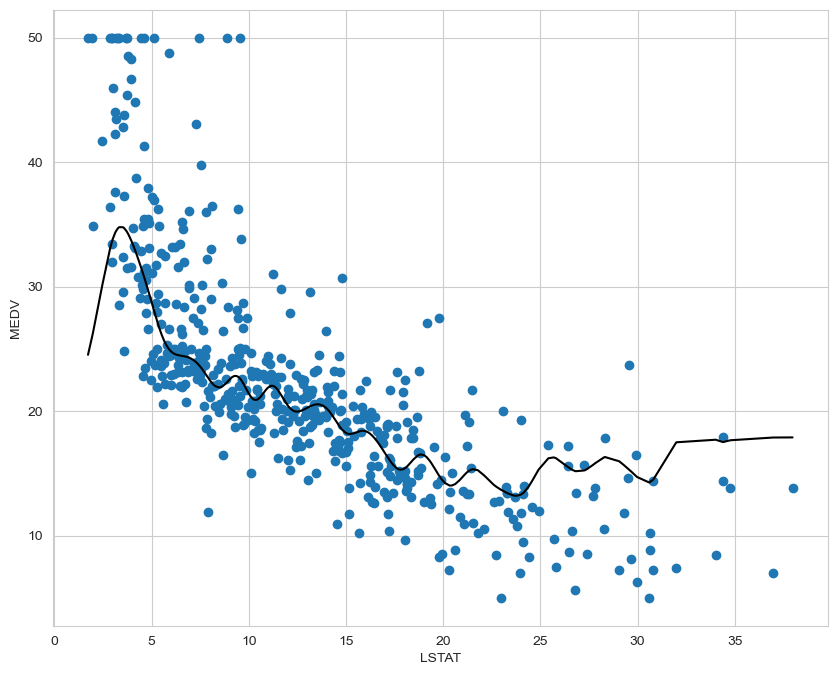

In [59]:
sort_idx = X.flatten().argsort()

plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx].reshape(-1, 1)), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 41.8187, test: 36.8372


c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.5242, test: 0.5056


In [63]:
svr = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')
svr.fit(X_train, y_train)

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, degree=2, gamma='auto', kernel='poly')

In [64]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 110.3334, test: 114.3676
R^2 train: -0.2553, test: -0.5349


In [65]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=0.1)

In [66]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 27.5635, test: 26.7051
R^2 train: 0.6864, test: 0.6416


## 6️⃣ Ventajas y Desventajas

### 🟢 Ventajas de las Máquinas de Vectores de Soporte (SVM):

- Eficaces en espacios de alta dimensión.  
- Utilizan solo un subconjunto de los puntos de entrenamiento (vectores de soporte) en la función de decisión.  
- Permiten especificar diferentes funciones de núcleo (*Kernel*) para la función de decisión:  
  - Lineal  
  - Polinómico  
  - RBF (Radial Basis Function)  
  - Sigmoide  
  - Personalizado  

---

### 🔴 Desventajas de las Máquinas de Vectores de Soporte:

- Riesgo de **sobreajuste** cuando el número de características (**num_features**) es mayor que el número de muestras (**num_samples**).  
- La elección del **núcleo** y la **regularización** puede tener un gran impacto en el rendimiento.  
- No proporcionan **estimaciones de probabilidad** directamente.  

---

### 📋 Resumen

| Clase          | Soporte Out-of-core | Kernel Trick |
| :-------------- | :-----------------: | :-----------: |
| `SGDClassifier` | ✅ Sí               | ❌ No         |
| `LinearSVC`     | ❌ No               | ❌ No         |
| `SVC`           | ❌ No               | ✅ Sí         |

---

> **Nota:** Todas las versiones de SVM requieren **escalado de características**.

Los algoritmos de Máquinas de Vectores de Soporte **no son invariantes a la escala**, por lo que se recomienda **escalar los datos** antes de entrenar el modelo.  
Por ejemplo, puedes escalar cada atributo del vector de entrada **X** al rango `[0, 1]` o `[-1, +1]`, o estandarizarlo para que tenga **media 0 y varianza 1**.  

Ten en cuenta que **el mismo escalado** debe aplicarse al conjunto de prueba para obtener resultados coherentes.  
